In [6]:
# Import Modules...
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud






In [8]:
Jigsaw = pd.read_csv('train.csv',encoding = 'latin1')


In [9]:
Jigsaw.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
59905,a061a90ecdc82fb3,Please do not remove speedy deletion tags from...,0,0,0,0,0,0
60752,a29ff68d099f3c56,what? i have absolutely no idea what you are t...,0,0,0,0,0,0
13384,235778e63f2b6af0,"FYI, IT IS HE Pic Editor96",0,0,0,0,0,0
28092,4a57ba9759fcdb2f,Created this page from information deleted fro...,0,0,0,0,0,0
138884,e742bada56276b44,KORG IS A MORON! 216.229.227.144 216.229.227....,1,0,0,0,0,0


In [10]:
target_columns = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [11]:
# check missing values in numeric columns
Jigsaw.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# check for any 'null' comment
null_comment = Jigsaw[Jigsaw['comment_text'].isnull()]
len(null_comment)


0

In [15]:
Jigsaw['char_length'] = Jigsaw['comment_text'].apply(lambda x: len(str(x)))

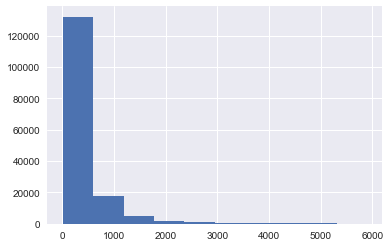

In [16]:
sns.set()
Jigsaw['char_length'].hist()
plt.show()

In [36]:
Toxic_comments = Jigsaw.loc[Jigsaw.toxic==1]

In [37]:
Toxic_comments.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_length
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,319
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,57
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,648
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,40


In [41]:
Toxic_comments = Toxic_comments[['comment_text','toxic']]

In [42]:
Toxic_comments.head

<bound method NDFrame.head of                                              comment_text  toxic
6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1
12      Hey... what is it..\n@ | talk .\nWhat is it......      1
16      Bye! \n\nDon't look, come or think of comming ...      1
42      You are gay or antisemmitian? \n\nArchangel WH...      1
43               FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!      1
44      I'm Sorry \n\nI'm sorry I screwed around with ...      1
51      GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK T...      1
55      Stupid peace of shit stop deleting my stuff as...      1
56      =Tony Sidaway is obviously a fistfuckee. He lo...      1
58      My Band Page's deletion. You thought I was gon...      1
59      Why can't you believe how fat Artie is? Did yo...      1
65      All of my edits are good.  Cunts like you who ...      1
79      Hi! I am back again!\nLast warning!\nStop undo...      1
86      Would you both shut up, you don't run wikipedi...   

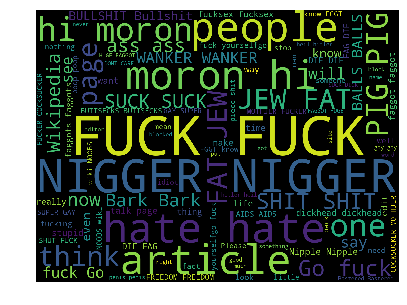

In [45]:
#WordCloud
cloud = WordCloud(width=1440, height= 1080,max_words= 100).generate(' '.join(Toxic_comments['comment_text'].astype(str)))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [46]:
Severe_toxic  = Jigsaw.loc[Jigsaw.severe_toxic==1]

In [47]:
Severe_toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_length
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,89
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0,53
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0,40
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0,67


In [48]:
Severe_toxic = Severe_toxic[['comment_text','severe_toxic']]

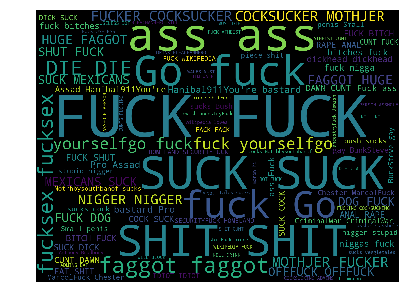

In [49]:
#WordCloud
cloud = WordCloud(width=1440, height= 1080,max_words= 100).generate(' '.join(Severe_toxic['comment_text'].astype(str)))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [50]:
Threat_comments  = Jigsaw.loc[Jigsaw.threat==1]

In [51]:
Threat_comments.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_length
79,003217c3eb469ba9,Hi! I am back again!\nLast warning!\nStop undo...,1,0,0,1,0,0,64
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1,128
600,0199d6af27b715f3,I'm also a sock puppet of this account...SUPRI...,1,0,0,1,0,0,138
802,02230885017a50c5,"Fuck you, Smith. Please have me notified when ...",1,0,1,1,1,0,85
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1,150


In [52]:
Threat_comments = Threat_comments[['comment_text','threat']]

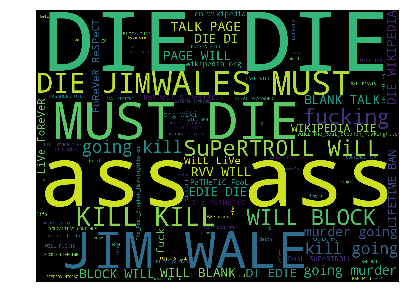

In [53]:
#WordCloud
cloud = WordCloud(width=1440, height= 1080,max_words= 100).generate(' '.join(Threat_comments['comment_text'].astype(str)))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [57]:
IdentityHate_comments  = Jigsaw.loc[Jigsaw.identity_hate==1]

In [58]:
IdentityHate_comments = IdentityHate_comments[['comment_text','identity_hate']]

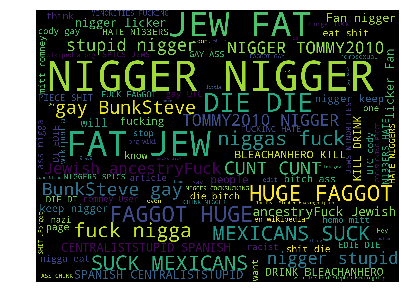

In [59]:
#WordCloud
cloud = WordCloud(width=1440, height= 1080,max_words= 100).generate(' '.join(IdentityHate_comments['comment_text'].astype(str)))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [60]:
Obscene_comments  = Jigsaw.loc[Jigsaw.obscene==1]

In [61]:
Obscene_comments = Obscene_comments[['comment_text','obscene']]

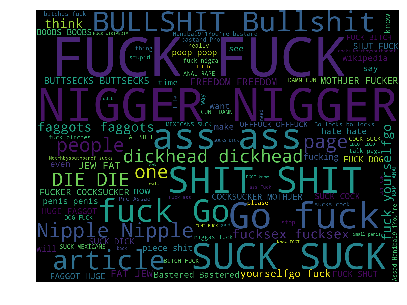

In [62]:
#WordCloud
cloud = WordCloud(width=1440, height= 1080,max_words= 100).generate(' '.join(Obscene_comments['comment_text'].astype(str)))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()